In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [ ]:
raw_df = pd.read_csv('weatherAUS.csv')

In [ ]:
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            NaN           W           44.0          W        WNW   
1            NaN         WNW           44.0        NNW        WSW   
2            NaN         WSW           46.0          W        WSW   
3            NaN          NE           24.0         SE          E   
4            NaN           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   
145459       NaN         NaN            NaN        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1       8.0       NaN     16.9     21.8        No   
1            1007.8       NaN       NaN     17.2     24.3        No   
2            1008.7       NaN       2.0     21.0     23.2        No   
3            1012.8       NaN       NaN     18.1     26.5        No   
4            1006.0       7.0       8.0     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
145455       1020.3       NaN       NaN     10.1     22.4        No   
145456       1019.1       NaN       NaN     10.9     24.5        No   
145457       1016.8       NaN       NaN     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   
145459       1017.9       8.0       8.0     15.0     20.9        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
145455           No  
145456           No  
145457           No  
145458           No  
145459          NaN  

[145460 rows x 23 columns]

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
raw_df.dropna(subset=["RainTomorrow"],inplace=True)

In [ ]:
import plotly.express as px

In [ ]:
fig=px.histogram(raw_df, x= 'Location',color='RainToday',title='Location vs Rainy Days',color_discrete_sequence=['rosybrown','skyblue'],hover_data='RainToday')
fig.update_layout(width=900,height=600,bargap=0.3)

In [ ]:
fig = px.scatter(raw_df,x='MinTemp',y='MaxTemp',color='RainToday')
fig

In [ ]:
def hist_plot(x_in,color_in):
  fig = px.histogram(raw_df,x=x_in,color=color_in,title=f'{x_in} vs {color_in}',color_discrete_sequence=['rosybrown','skyblue'])
  return fig

In [ ]:
hist_plot('Temp3pm','RainTomorrow')

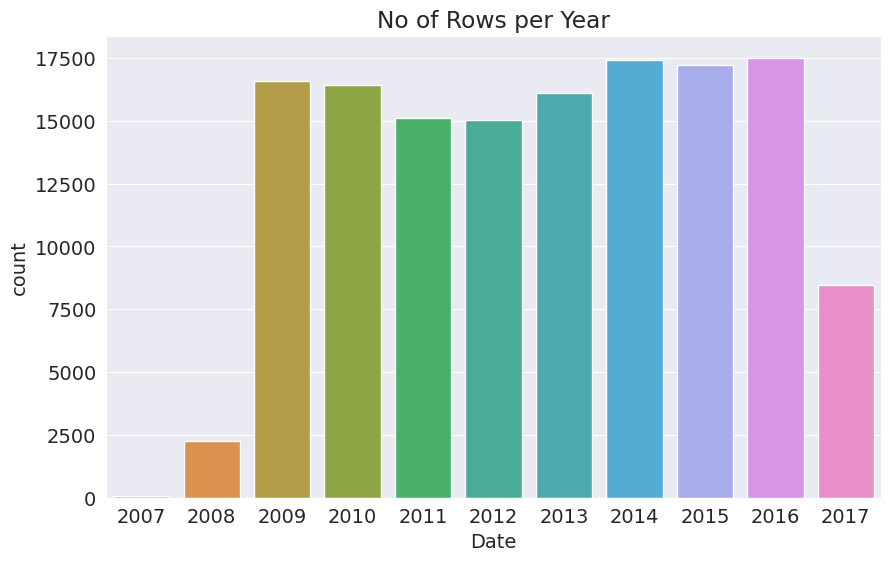

In [ ]:
plt.title('No of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

In [ ]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df   = raw_df[year == 2015]
test_df  = raw_df[year > 2015]

In [ ]:
print('train_df.shape',train_df.shape)
print('val_df.shape',val_df.shape)
print('test_df.shape',test_df.shape)

train_df.shape (98988, 23)
val_df.shape (17231, 23)
test_df.shape (25974, 23)


In [ ]:
#inputs and targets column

In [ ]:
input_cols = list(train_df.columns)[1:-1] #excluding date column and target column
target_col = 'RainTomorrow'

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()


In [ ]:
print(numeric_cols)
print(categorical_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [ ]:
#imputer

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean').fit(raw_df[numeric_cols])


In [ ]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [ ]:
test_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [ ]:
test_inputs[categorical_cols].isna().sum()

Location          0
WindGustDir    1460
WindDir9am     1576
WindDir3pm     1228
RainToday       264
dtype: int64

In [ ]:
#scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
val_inputs.describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  17231.000000  17231.000000  17231.000000  17231.000000  17231.000000   
mean       0.488364      0.535061      0.005761      0.039356      0.529766   
std        0.154157      0.141075      0.022218      0.022895      0.176195   
min        0.007075      0.030246      0.000000      0.000000      0.000000   
25%        0.376179      0.429112      0.000000      0.035862      0.525852   
50%        0.487887      0.525520      0.000000      0.037723      0.525852   
75%        0.601415      0.637051      0.001617      0.037723      0.565517   
max        0.952830      0.948960      0.666307      0.485517      1.000000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   17231.000000  17231.000000  17231.000000  17231.000000  17231.000000   
mean        0.260422      0.106366      0.212012      0.681702      0.505003   
std         0.097937      0.066591      0.099354      0.197546      0.207120   
min         0.007752      0.000000      0.000000      0.040000      0.000000   
25%         0.193798      0.053846      0.149425      0.560000      0.360000   
50%         0.255814      0.100000      0.214225      0.690000      0.514826   
75%         0.310078      0.146154      0.275862      0.830000      0.640000   
max         1.000000      0.669231      0.850575      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  17231.000000  17231.000000  17231.000000  17231.000000  17231.000000   
mean       0.635487      0.630258      0.496524      0.500679      0.512768   
std        0.111121      0.107516      0.255261      0.236935      0.143615   
min        0.125620      0.081600      0.000000      0.000000      0.021097   
25%        0.568595      0.564800      0.333333      0.444444      0.409283   
50%        0.614876      0.611200      0.493021      0.500352      0.508439   
75%        0.705785      0.699200      0.666667      0.666667      0.616034   
max        0.971901      0.963200      0.888889      0.888889      0.943038   

            Temp3pm  
count  17231.000000  
mean       0.523809  
std        0.137566  
min        0.026871  
25%        0.424184  
50%        0.518234  
75%        0.618042  
max        0.925144

In [ ]:
val_inputs.describe().loc[['min','max']]

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
min  0.007075  0.030246  0.000000     0.000000       0.0       0.007752   
max  0.952830  0.948960  0.666307     0.485517       1.0       1.000000   

     WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
min      0.000000      0.000000         0.04          0.0     0.125620   
max      0.669231      0.850575         1.00          1.0     0.971901   

     Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  
min       0.0816  0.000000  0.000000  0.021097  0.026871  
max       0.9632  0.888889  0.888889  0.943038  0.925144

In [ ]:
#Encoding catgeorical data

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore').fit(raw_df[categorical_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [ ]:
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols]= encoder.transform(test_inputs[categorical_cols])

<ipython-input-36-a52f2c55893d>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-36-a52f2c55893d>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-36-a52f2c55893d>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-36-a52f2c55893d>:1: PerformanceWarning:

Da

In [ ]:
test_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2498     Albury  0.681604  0.801512  0.000000     0.037723  0.525852   
2499     Albury  0.693396  0.725898  0.001078     0.037723  0.525852   
2500     Albury  0.634434  0.527410  0.005930     0.037723  0.525852   
2501     Albury  0.608491  0.538752  0.042049     0.037723  0.525852   
2502     Albury  0.566038  0.523629  0.018329     0.037723  0.525852   
...         ...       ...       ...       ...          ...       ...   
145454    Uluru  0.283019  0.502836  0.000000     0.037723  0.525852   
145455    Uluru  0.266509  0.533081  0.000000     0.037723  0.525852   
145456    Uluru  0.285377  0.568998  0.000000     0.037723  0.525852   
145457    Uluru  0.327830  0.599244  0.000000     0.037723  0.525852   
145458    Uluru  0.384434  0.601134  0.000000     0.037723  0.525852   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2498           ENE       0.372093        NaN        ESE      0.000000   
2499           SSE       0.341085        SSE         SE      0.069231   
2500           ENE       0.325581        ESE        ENE      0.084615   
2501           SSE       0.255814         SE        SSE      0.069231   
2502           ENE       0.193798         SE        SSE      0.046154   
...            ...            ...        ...        ...           ...   
145454           E       0.193798        ESE          E      0.115385   
145455           E       0.193798         SE        ENE      0.100000   
145456         NNW       0.124031         SE          N      0.100000   
145457           N       0.240310         SE        WNW      0.069231   
145458          SE       0.170543        SSE          N      0.100000   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2498        0.080460         0.46         0.17     0.543802       0.5136   
2499        0.195402         0.54         0.30     0.505785       0.5008   
2500        0.448276         0.62         0.67     0.553719       0.6032   
2501        0.195402         0.74         0.65     0.618182       0.6304   
2502        0.103448         0.92         0.63     0.591736       0.5888   
...              ...          ...          ...          ...          ...   
145454      0.149425         0.59         0.27     0.730579       0.7056   
145455      0.126437         0.51         0.24     0.728926       0.6912   
145456      0.103448         0.56         0.21     0.710744       0.6720   
145457      0.103448         0.53         0.24     0.669421       0.6352   
145458      0.080460         0.51         0.24     0.642975       0.6304   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
2498    0.777778  0.333333  0.702532  0.808061        No                0.0   
2499    0.888889  0.888889  0.675105  0.712092        No                0.0   
2500    0.888889  0.888889  0.611814  0.477927       Yes                0.0   
2501    0.888889  0.888889  0.556962  0.518234       Yes                0.0   
2502    0.888889  0.888889  0.514768  0.529750       Yes                0.0   
...          ...       ...       ...       ...       ...                ...   
145454  0.493021  0.500352  0.350211  0.504798        No                0.0   
145455  0.493021  0.500352  0.364979  0.533589        No                0.0   
145456  0.493021  0.500352  0.381857  0.573896        No                0.0   
145457  0.493021  0.500352  0.415612  0.604607        No                0.0   
145458  0.333333  0.222222  0.470464  0.602687        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
2498                0.0              1.0                    0.0   
2499                0.0              1.0                    0.0   
2500                0.0              1.0                    0.0   
2501                0.0              1.0                    0.0   
2502                0.0              1.0                    0.0   
.

In [ ]:
test_inputs[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25974 entries, 2498 to 145458
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Location     25974 non-null  object
 1   WindGustDir  24514 non-null  object
 2   WindDir9am   24398 non-null  object
 3   WindDir3pm   24746 non-null  object
 4   RainToday    25710 non-null  object
dtypes: object(5)
memory usage: 1.2+ MB


In [ ]:
test_inputs[encoded_cols].describe()

Location_Adelaide  Location_Albany  Location_Albury  \
count       25974.000000     25974.000000     25974.000000   
mean            0.020752         0.020290         0.020675   
std             0.142554         0.140992         0.142295   
min             0.000000         0.000000         0.000000   
25%             0.000000         0.000000         0.000000   
50%             0.000000         0.000000         0.000000   
75%             0.000000         0.000000         0.000000   
max             1.000000         1.000000         1.000000   

       Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  \
count           25974.000000            25974.000000       25974.000000   
mean                0.020521                0.020174           0.020790   
std                 0.141775                0.140598           0.142683   
min                 0.000000                0.000000           0.000000   
25%                 0.000000                0.000000           0.000000   
50%                 0.000000                0.000000           0.000000   
75%                 0.000000                0.000000           0.000000   
max                 1.000000                1.000000           1.000000   

       Location_Bendigo  Location_Brisbane  Location_Cairns  \
count      25974.000000       25974.000000     25974.000000   
mean           0.020636           0.020559         0.019019   
std            0.142165           0.141905         0.136594   
min            0.000000           0.000000         0.000000   
25%            0.000000           0.000000         0.000000   
50%            0.000000           0.000000         0.000000   
75%            0.000000           0.000000         0.000000   
max            1.000000           1.000000         1.000000   

       Location_Canberra  Location_Cobar  Location_CoffsHarbour  \
count       25974.000000    25974.000000           25974.000000   
mean            0.020790        0.020290               0.020867   
std             0.142683        0.140992               0.142942   
min             0.000000        0.000000               0.000000   
25%             0.000000        0.000000               0.000000   
50%             0.000000        0.000000               0.000000   
75%             0.000000        0.000000               0.000000   
max             1.000000        1.000000               1.000000   

       Location_Dartmoor  Location_Darwin  Location_GoldCoast  \
count       25974.000000     25974.000000        25974.000000   
mean            0.020790         0.020829            0.019597   
std             0.142683         0.142813            0.138612   
min             0.000000         0.000000            0.000000   
25%             0.000000         0.000000            0.000000   
50%             0.000000         0.000000            0.000000   
75%             0.000000         0.000000            0.000000   
max             1.000000         1.000000            1.000000   

       Location_Hobart  Location_Katherine  Location_Launceston  \
count     25974.000000        25974.000000         25974.000000   
mean          0.020867            0.020444             0.020713   
std           0.142942            0.141515             0.142425   
min           0.000000            0.000000             0.000000   
25%           0.000000            0.000000             0.000000   
50%           0.000000            0.000000             0.000000   
75%           0.000000            0.000000             0.000000   
max           1.000000            1.000000             1.000000   

       Location_Melbourne  Location_MelbourneAirport  Location_Mildura  \
count        25974.000000               25974.000000      25974.000000   
mean             0.016247                   0.020867          0.020867   
std              0.126427                   0.142942          0.142942   
min              0.000000                   0.000000          0.000000   
25%              0.000000               

In [ ]:
X_train = train_inputs[numeric_cols+ encoded_cols]
X_val = val_inputs[numeric_cols+encoded_cols]
X_test = test_inputs[numeric_cols+encoded_cols]

In [ ]:
X_test

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
2498    0.681604  0.801512  0.000000     0.037723  0.525852       0.372093   
2499    0.693396  0.725898  0.001078     0.037723  0.525852       0.341085   
2500    0.634434  0.527410  0.005930     0.037723  0.525852       0.325581   
2501    0.608491  0.538752  0.042049     0.037723  0.525852       0.255814   
2502    0.566038  0.523629  0.018329     0.037723  0.525852       0.193798   
...          ...       ...       ...          ...       ...            ...   
145454  0.283019  0.502836  0.000000     0.037723  0.525852       0.193798   
145455  0.266509  0.533081  0.000000     0.037723  0.525852       0.193798   
145456  0.285377  0.568998  0.000000     0.037723  0.525852       0.124031   
145457  0.327830  0.599244  0.000000     0.037723  0.525852       0.240310   
145458  0.384434  0.601134  0.000000     0.037723  0.525852       0.170543   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
2498        0.000000      0.080460         0.46         0.17     0.543802   
2499        0.069231      0.195402         0.54         0.30     0.505785   
2500        0.084615      0.448276         0.62         0.67     0.553719   
2501        0.069231      0.195402         0.74         0.65     0.618182   
2502        0.046154      0.103448         0.92         0.63     0.591736   
...              ...           ...          ...          ...          ...   
145454      0.115385      0.149425         0.59         0.27     0.730579   
145455      0.100000      0.126437         0.51         0.24     0.728926   
145456      0.100000      0.103448         0.56         0.21     0.710744   
145457      0.069231      0.103448         0.53         0.24     0.669421   
145458      0.100000      0.080460         0.51         0.24     0.642975   

        Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  \
2498         0.5136  0.777778  0.333333  0.702532  0.808061   
2499         0.5008  0.888889  0.888889  0.675105  0.712092   
2500         0.6032  0.888889  0.888889  0.611814  0.477927   
2501         0.6304  0.888889  0.888889  0.556962  0.518234   
2502         0.5888  0.888889  0.888889  0.514768  0.529750   
...             ...       ...       ...       ...       ...   
145454       0.7056  0.493021  0.500352  0.350211  0.504798   
145455       0.6912  0.493021  0.500352  0.364979  0.533589   
145456       0.6720  0.493021  0.500352  0.381857  0.573896   
145457       0.6352  0.493021  0.500352  0.415612  0.604607   
145458       0.6304  0.333333  0.222222  0.470464  0.602687   

        Location_Adelaide  Location_Albany  Location_Albury  \
2498                  0.0              0.0              1.0   
2499                  0.0              0.0              1.0   
2500                  0.0              0.0              1.0   
2501                  0.0              0.0              1.0   
2502                  0.0              0.0              1.0   
...                   ...              ...              ...   
145454                0.0              0.0              0.0   
145455                0.0              0.0              0.0   
145456                0.0              0.0              0.0   
145457                0.0              0.0              0.0   
145458                0.0              0.0              0.0   

        Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  \
2498                      0.0                     0.0                0.0   
2499                      0.0                     0.0                0.0   
2500                      0.0                     0.0                0.0   
2501                      0.0                     0.0                0.0   
2502                      0.0                     0.0                0.0   
...                       ...                     ...                ...   
145454                    0.0                     0.0                0.0   
145455                   

In [ ]:
#building model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state=42)

In [ ]:
model.fit(X_train,train_targets)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
train_preds = model.predict(X_train)

In [ ]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
pd.value_counts(train_preds)

No     76707
Yes    22281
dtype: int64

In [ ]:
train_probs = model.predict_proba(X_train)

In [ ]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
accuracy_score(train_preds,train_targets)

0.9999797955307714

In [ ]:
confusion_matrix(train_preds,train_targets,normalize='true')

array([[9.99973927e-01, 2.60732397e-05],
       [0.00000000e+00, 1.00000000e+00]])

In [ ]:
#checking for validation set too

#using model.score

In [ ]:
model.score(X_val,val_targets)

0.7921188555510418

In [ ]:
val_targets.value_counts()/ len(val_targets)

No     0.788289
Yes    0.211711
Name: RainTomorrow, dtype: float64

In [ ]:
val_targets.value_counts()

No     13583
Yes     3648
Name: RainTomorrow, dtype: int64

In [ ]:
#visualize

In [ ]:
from sklearn.tree import plot_tree,export_text

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439, 11979]'),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538, 7714]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.01\ngini = 0.316\nsamples = 7434\nvalue = [1462, 5972]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

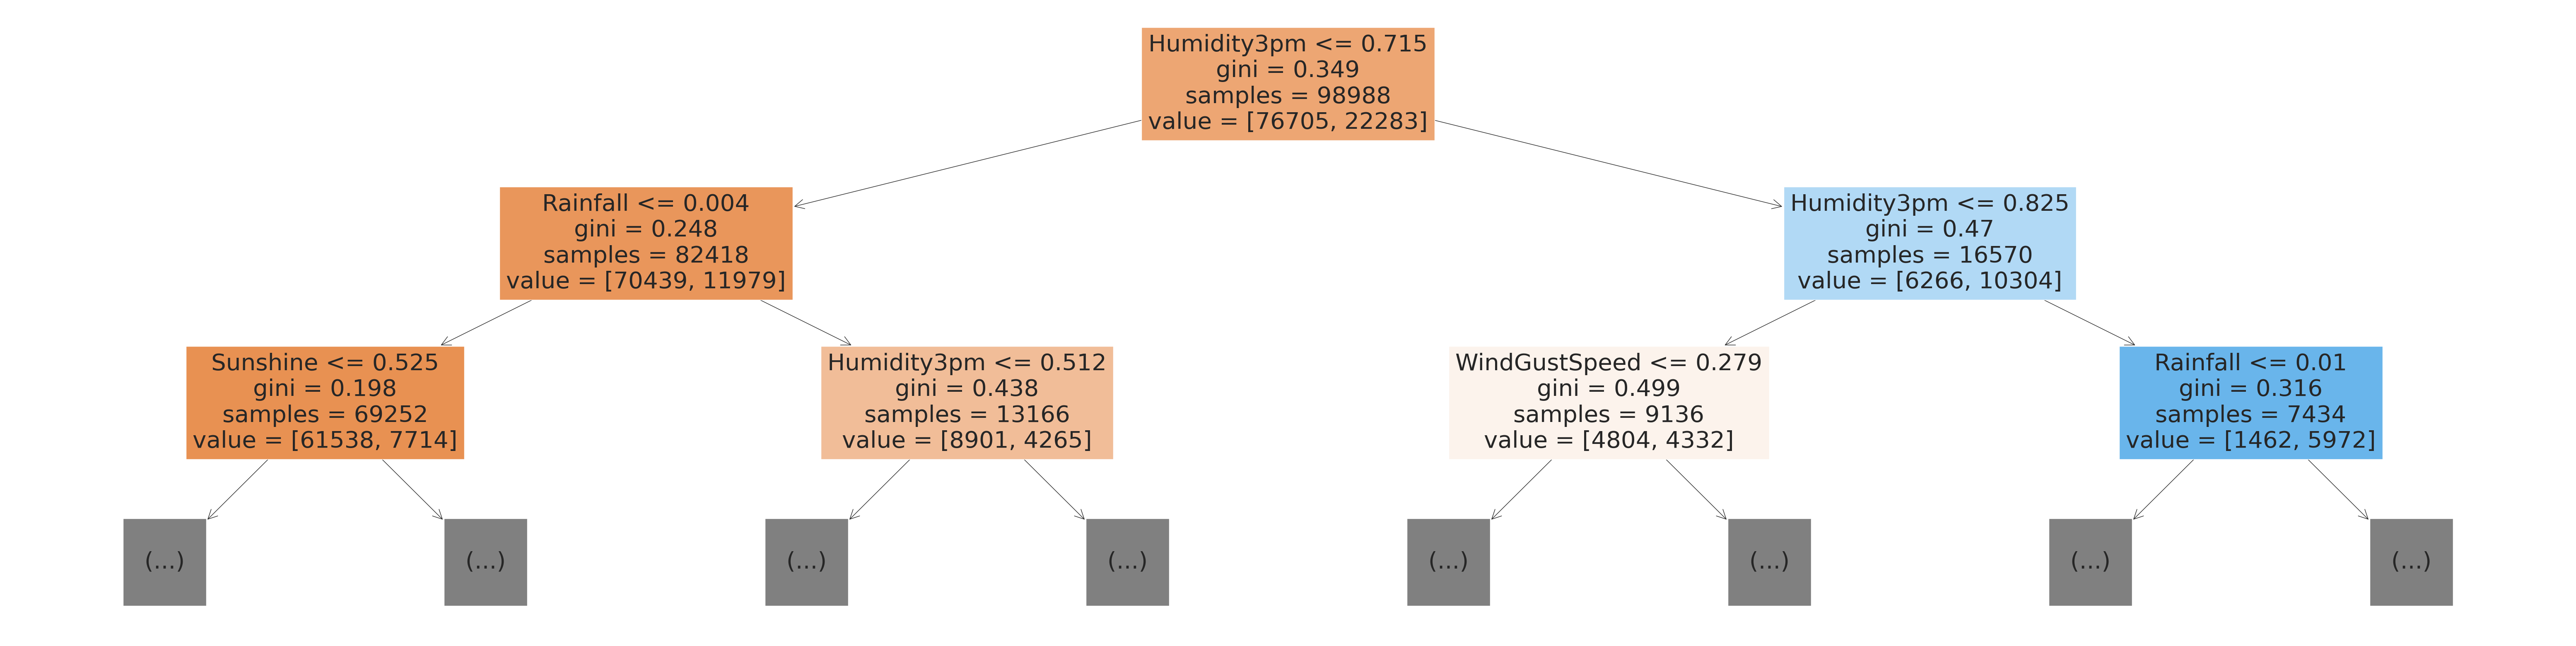

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model,feature_names = X_train.columns,max_depth=2,filled=True)

In [ ]:
model.tree_.max_depth

48

In [ ]:
# we can also display the tree as text, which can be easier to follow for deeper trees

In [ ]:
tree_text = export_text(model,max_depth=10,feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

In [ ]:
model.feature_importances_

array([3.48942086e-02, 3.23605486e-02, 5.91385668e-02, 2.49619907e-02,
       4.94652143e-02, 5.63334673e-02, 2.80205998e-02, 2.98128801e-02,
       4.02182908e-02, 2.61441297e-01, 3.44145027e-02, 6.20573699e-02,
       1.36406176e-02, 1.69229866e-02, 3.50001550e-02, 3.04064076e-02,
       2.24086587e-03, 2.08018104e-03, 1.27475954e-03, 7.26936324e-04,
       1.39779517e-03, 1.15264873e-03, 6.92808159e-04, 1.80675598e-03,
       1.08370901e-03, 1.19773895e-03, 8.87119103e-04, 2.15764220e-03,
       1.67094731e-03, 7.98919493e-05, 1.10558668e-03, 1.42008656e-03,
       4.10087635e-04, 1.09028115e-03, 1.44164766e-03, 9.08284767e-04,
       1.05770304e-03, 6.18133455e-04, 1.80387272e-03, 2.10403527e-03,
       2.74413333e-04, 7.31599405e-04, 1.35408990e-03, 1.54759332e-03,
       1.30917564e-03, 1.07134670e-03, 8.36408023e-04, 1.62662229e-03,
       1.00326116e-03, 2.16053455e-03, 8.46802258e-04, 1.88919081e-03,
       9.29325203e-04, 1.29545157e-03, 1.27604831e-03, 5.12736888e-04,
      

In [ ]:
importance_df = pd.DataFrame({
    'feature':X_train.columns,
    'importance':model.feature_importances_
}).sort_values('importance',ascending=False)

In [ ]:
importance_df.head(10)

feature  importance
9     Humidity3pm    0.261441
11    Pressure3pm    0.062057
2        Rainfall    0.059139
5   WindGustSpeed    0.056333
4        Sunshine    0.049465
8     Humidity9am    0.040218
14        Temp9am    0.035000
0         MinTemp    0.034894
10    Pressure9am    0.034415
1         MaxTemp    0.032361

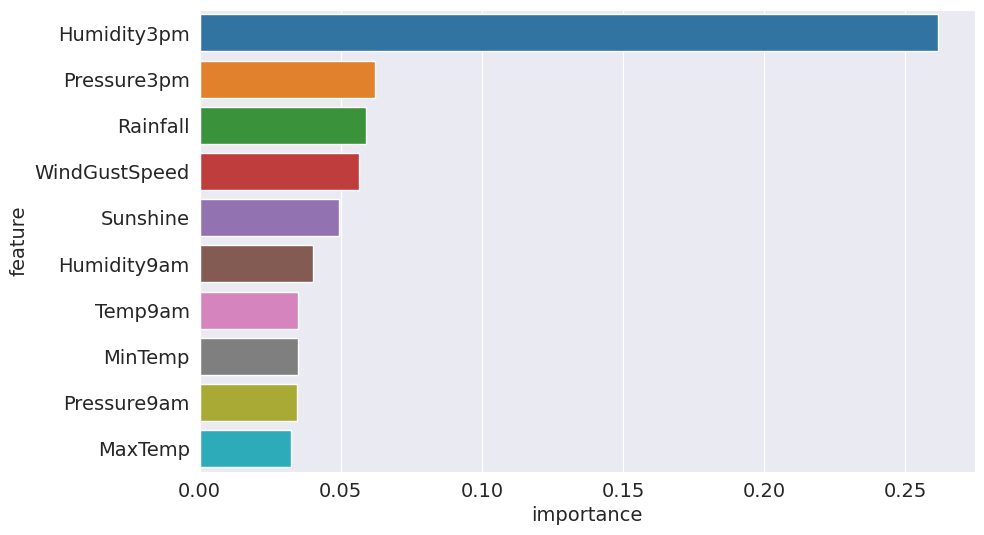

In [ ]:
sns.barplot(data=importance_df.head(10),x='importance',y='feature');

In [ ]:
#hyperparameter tuning max_depth

In [ ]:
model.tree_.max_depth

48

#now we're going to reduce the max_depths while defining the model itself

In [ ]:
model = DecisionTreeClassifier(max_depth=3,random_state=42)

In [ ]:
model.fit(X_train,train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
train_preds = model.predict(X_train)

In [ ]:
pd.value_counts(train_preds)

No     88001
Yes    10987
dtype: int64

In [ ]:
accuracy_score(train_preds,train_targets)

0.8291308037337859

In [ ]:
model.score(X_val,val_targets)

0.8334397307178921

In [ ]:
model.feature_importances_

array([0.        , 0.        , 0.11887326, 0.        , 0.05327578,
       0.02700542, 0.        , 0.        , 0.        , 0.80084554,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
pd.DataFrame({
    'feature':X_train.columns,
    'importance':model.feature_importances_
}).sort_values('importance',ascending=False).head(10)

feature  importance
9       Humidity3pm    0.800846
2          Rainfall    0.118873
4          Sunshine    0.053276
5     WindGustSpeed    0.027005
83   WindDir9am_ENE    0.000000
78    WindGustDir_W    0.000000
79  WindGustDir_WNW    0.000000
80  WindGustDir_WSW    0.000000
81  WindGustDir_nan    0.000000
82     WindDir9am_E    0.000000

In [ ]:
model.classes_

array(['No', 'Yes'], dtype=object)

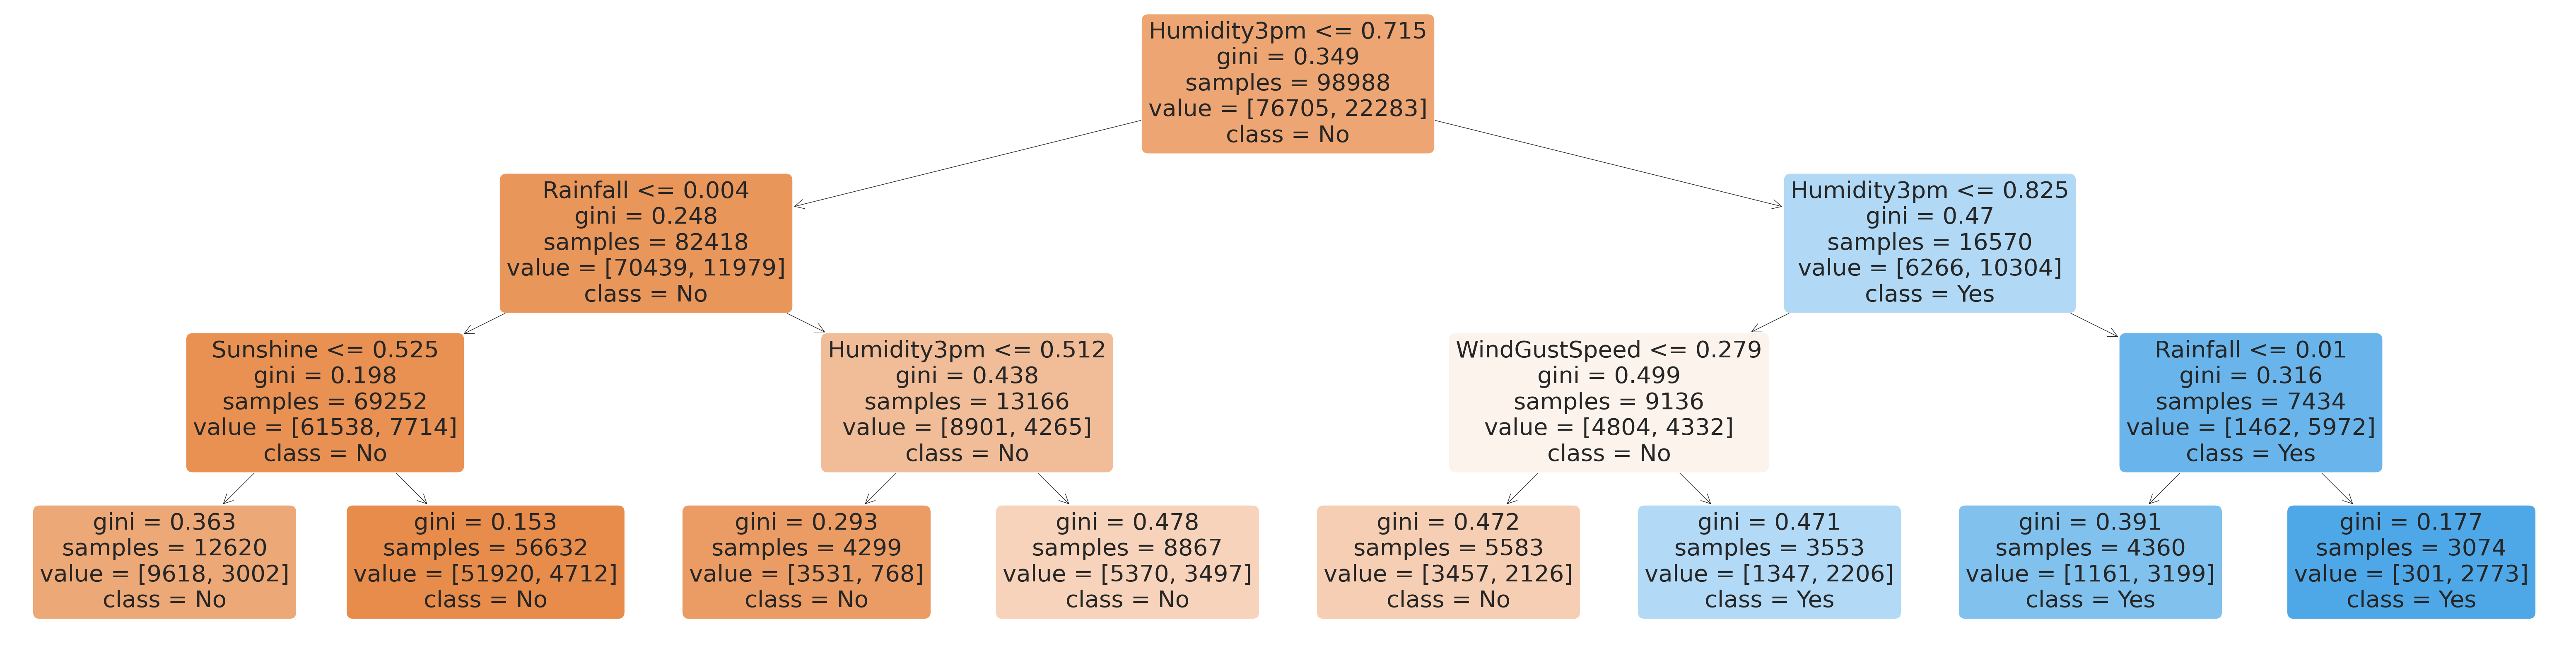

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model,feature_names = X_train.columns,filled=True,rounded=True,class_names = model.classes_);

In [ ]:
print(export_text(model,feature_names = list(X_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.52
|   |   |   |--- class: No
|   |--- Rainfall >  0.00
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  0.51
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- WindGustSpeed <= 0.28
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.28
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



In [ ]:
#rtrying with different depths

In [ ]:
def max_depths(md):
  model = DecisionTreeClassifier(max_depth=md,random_state=42)
  model.fit(X_train,train_targets)
  train_err = 1- model.score(X_train,train_targets)
  val_err = 1- model.score(X_val,val_targets)
  return {'Max Depth':md, 'Training Error':train_err, 'Validation Error':val_err}

In [ ]:
max_depths(4)

{'Max Depth': 4,
 'Training Error': 0.1657069543783085,
 'Validation Error': 0.1643549416748883}

In [ ]:
errors__df = pd.DataFrame([max_depths(md) for md in range(1,21)])

In [ ]:
errors__df

Max Depth  Training Error  Validation Error
0           1        0.184315          0.177935
1           2        0.179547          0.172712
2           3        0.170869          0.166560
3           4        0.165707          0.164355
4           5        0.160676          0.159074
5           6        0.156271          0.157275
6           7        0.153312          0.154605
7           8        0.147806          0.158029
8           9        0.140906          0.156578
9          10        0.132945          0.157333
10         11        0.123227          0.159248
11         12        0.113489          0.160815
12         13        0.101750          0.163833
13         14        0.089981          0.167373
14         15        0.078999          0.171261
15         16        0.068180          0.174279
16         17        0.058138          0.176890
17         18        0.048733          0.181243
18         19        0.040025          0.187569
19         20        0.032539          0.190297

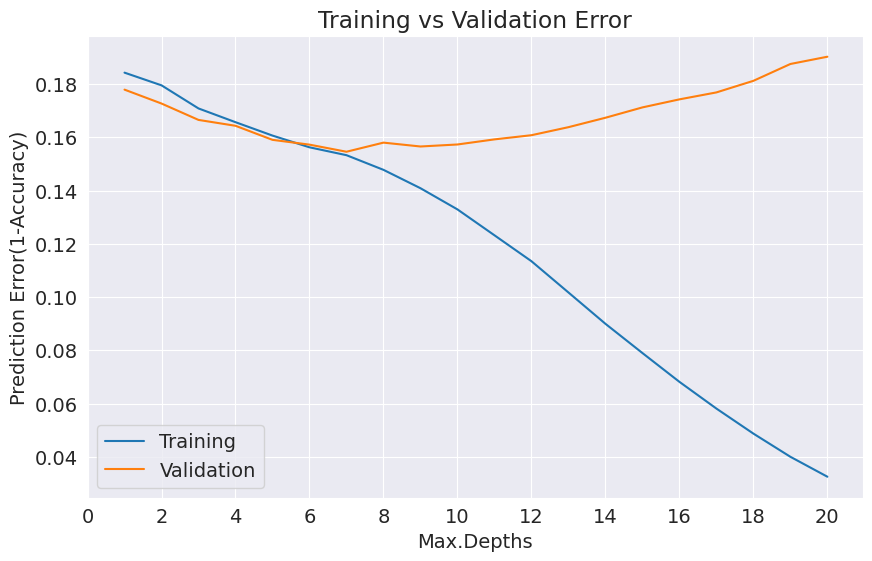

In [ ]:
plt.figure()
plt.plot(errors__df['Max Depth'],errors__df['Training Error']);
plt.plot(errors__df['Max Depth'],errors__df['Validation Error']);
plt.title('Training vs Validation Error')
plt.xlabel('Max.Depths')
plt.ylabel('Prediction Error(1-Accuracy)')
plt.xticks(range(0,21,2));
plt.legend(['Training', 'Validation'])

In [ ]:
# so while looking into it the max_depths of 7 would be fine

In [ ]:
model = DecisionTreeClassifier(max_depth=7,random_state=42).fit(X_train,train_targets)
print(model.score(X_train,train_targets))
print(model.score(X_val,val_targets))

0.8466884874934335
0.8453949277465034


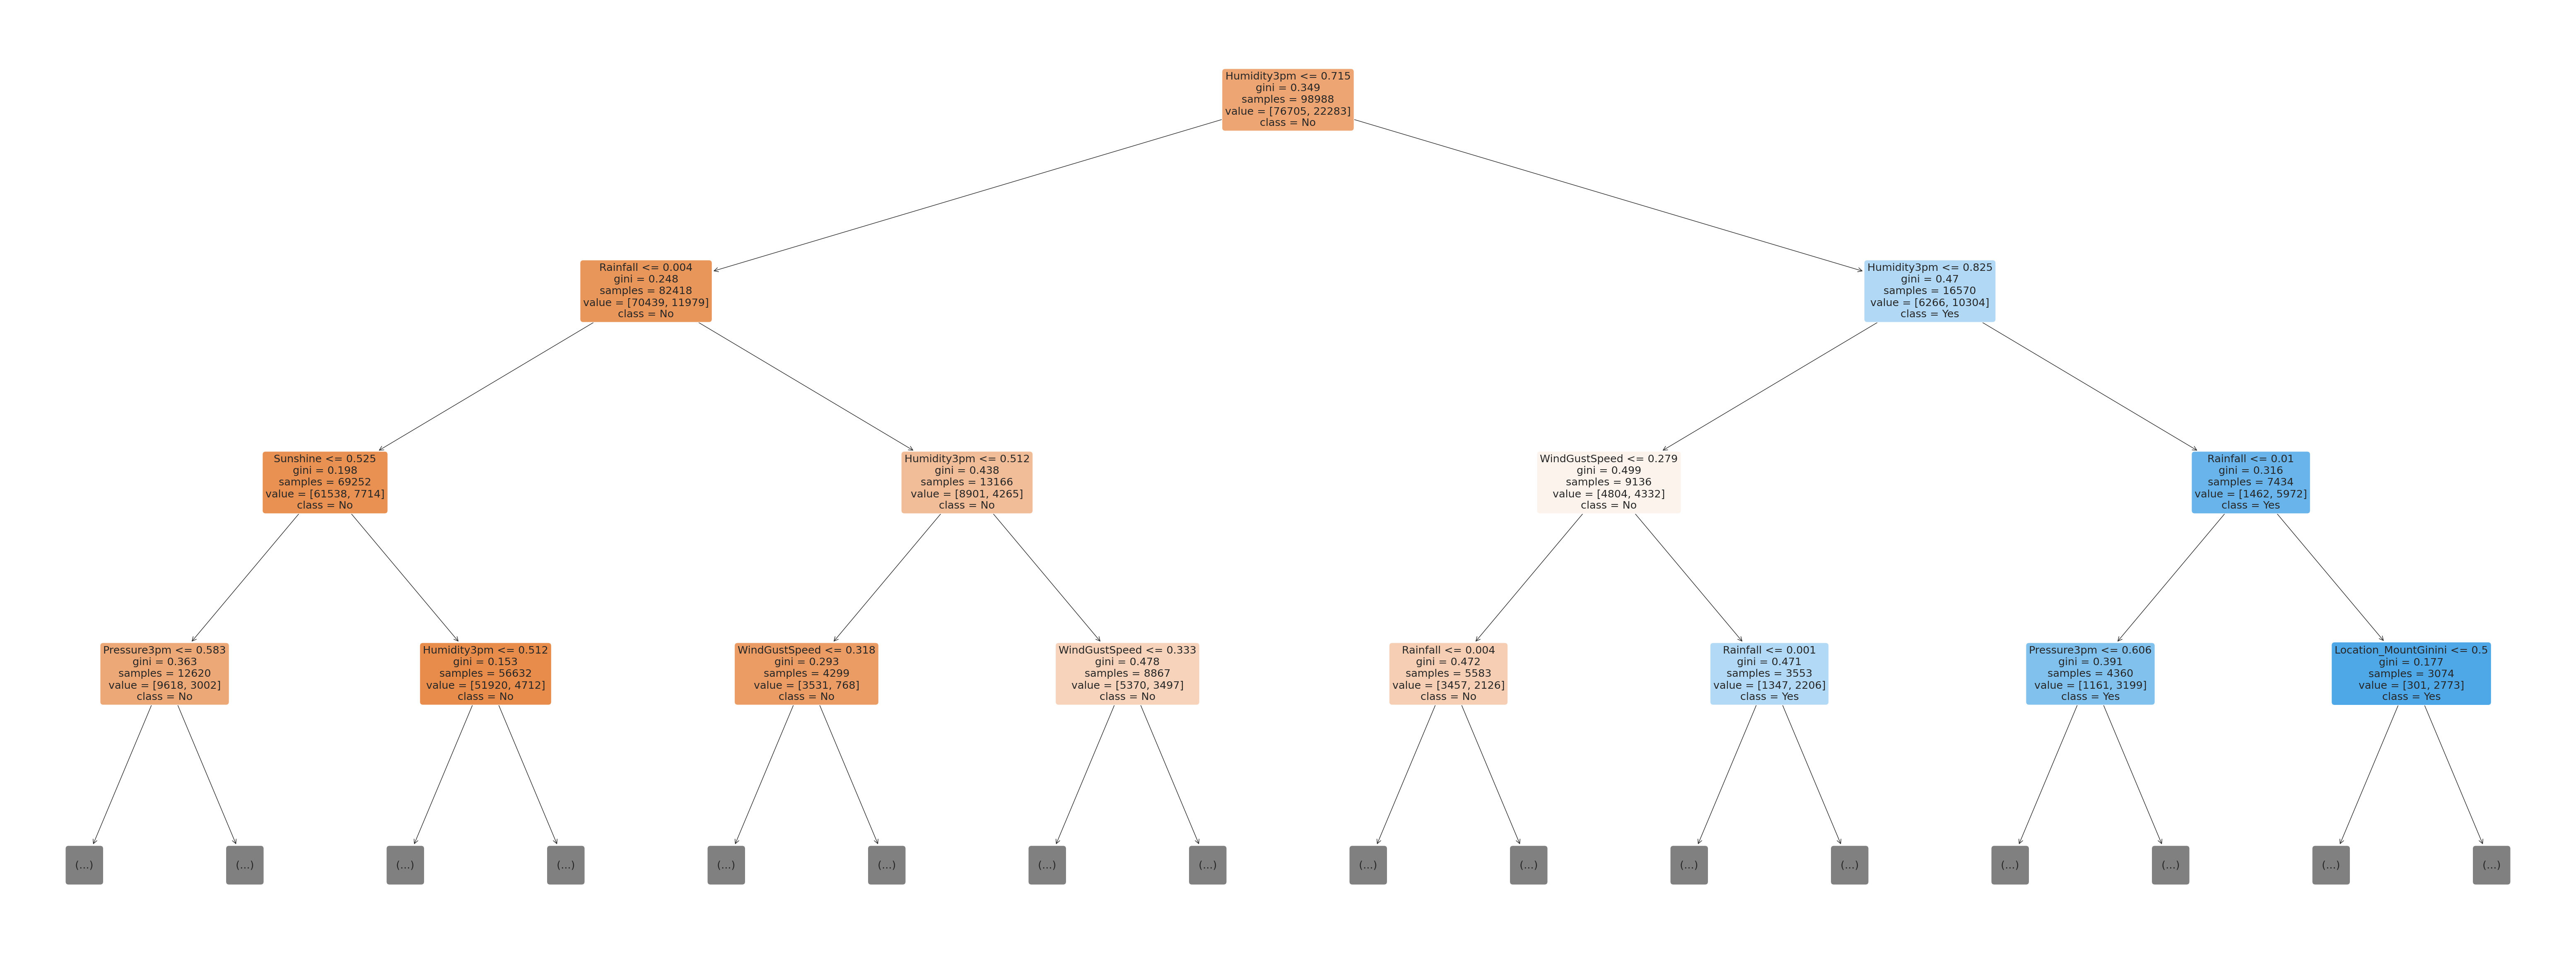

In [ ]:
plt.figure(figsize=(80,30))
plot_tree(model,feature_names = X_train.columns,rounded=True,filled=True,class_names= model.classes_,max_depth=3);

In [ ]:
# we are going for second hyperparameter i.e max_leaf_nodes

In [ ]:
model = DecisionTreeClassifier(max_leaf_nodes=128,random_state = 42)

In [ ]:
model.fit(X_train,train_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [ ]:
model.score(X_train,train_targets)

0.8480421869317493

In [ ]:
model.score(X_val,val_targets)

0.8442342290058615

In [ ]:
model.tree_.max_depth

12

In [ ]:
model_text = export_text(model,feature_names=list(X_train.columns))
print(model_text[:3000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Sunshine <= 0.05
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.05
|   |   |   |   |   |   |   |--- Pressure3pm <= 0.43
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Pressure3pm >  0.43
|   |   |   |   |   |   |   |   |--- Humidity3pm <= 0.57
|   |   |   |   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindD

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_jobs=-1,random_state=42)

In [ ]:
model.fit(X_train,train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
model.score(X_train,train_targets)

0.9999494888269285

In [ ]:
model.score(X_val,val_targets)

0.8566537055307295

In [ ]:
model.score(X_test,test_targets)

0.8447678447678447

In [ ]:
train_probs = model.predict_proba(X_train)

In [ ]:
train_probs

array([[0.93, 0.07],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.96, 0.04]])

In [ ]:
print(model.estimators_[99])
print(model.estimators_[0])

DecisionTreeClassifier(max_features='sqrt', random_state=134489564)
DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)


In [ ]:
model.n_estimators

100

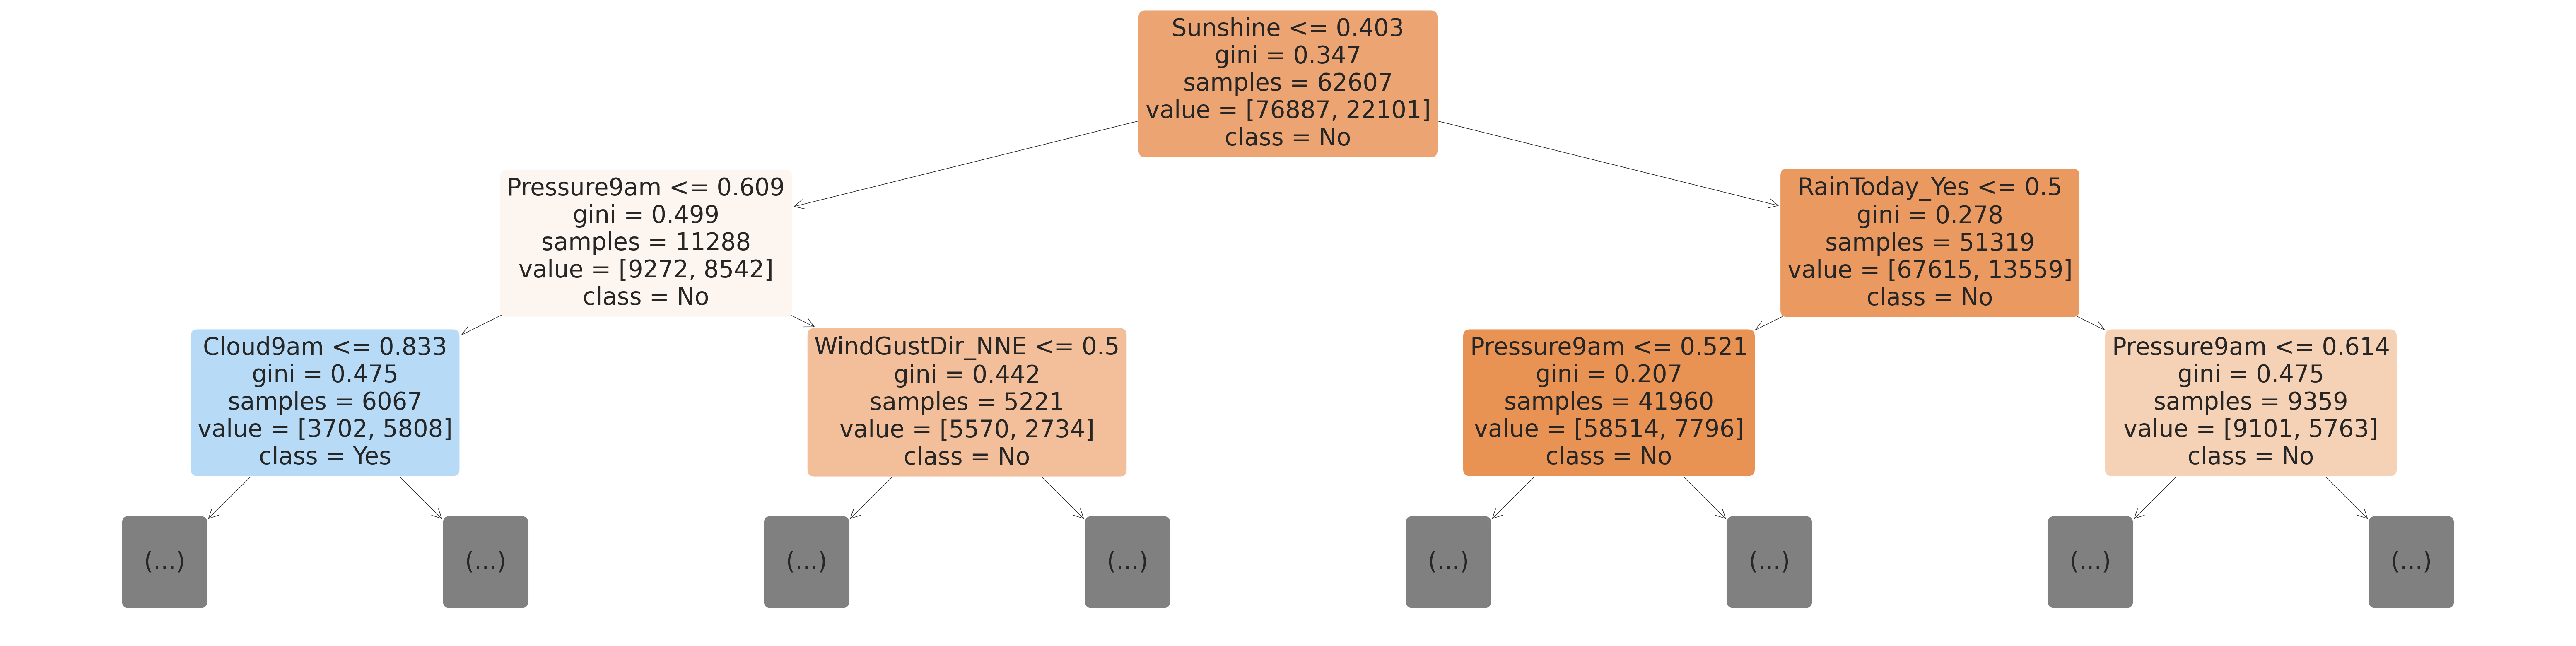

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0],max_depth=2,feature_names=X_train.columns,filled=True,rounded=True,class_names = model.classes_);

In [ ]:
len(model.estimators_) # or model.n_estimators

100

In [ ]:
#verify that none of the individual decision trees have bettwe validation accuracy than the random forest

In [ ]:
importance_df = pd.DataFrame({
    'feature':X_train.columns,
    'importance':model.feature_importances_
}).sort_values('importance',ascending=False)

In [ ]:
importance_df

feature  importance
9                  Humidity3pm    0.139904
4                     Sunshine    0.053696
11                 Pressure3pm    0.052713
8                  Humidity9am    0.050051
2                     Rainfall    0.048077
10                 Pressure9am    0.047944
5                WindGustSpeed    0.047477
15                     Temp3pm    0.044379
1                      MaxTemp    0.041865
0                      MinTemp    0.041199
14                     Temp9am    0.038844
13                    Cloud3pm    0.034792
7                 WindSpeed3pm    0.030621
6                 WindSpeed9am    0.028047
3                  Evaporation    0.024394
12                    Cloud9am    0.024199
116               RainToday_No    0.020733
117              RainToday_Yes    0.020241
85                WindDir9am_N    0.004110
106              WindDir3pm_NW    0.003636
105             WindDir3pm_NNW    0.003591
87              WindDir9am_NNE    0.003415
102               WindDir3pm_N    0.003394
113             WindDir3pm_WNW    0.003380
89               WindDir9am_NW    0.003376
68               WindGustDir_N    0.003375
72              WindGustDir_NW    0.003359
78               WindGustDir_W    0.003296
112               WindDir3pm_W    0.003282
88              WindDir9am_NNW    0.003265
79             WindGustDir_WNW    0.003202
95                WindDir9am_W    0.003190
73               WindGustDir_S    0.003040
71             WindGustDir_NNW    0.003028
108              WindDir3pm_SE    0.003023
107               WindDir3pm_S    0.003017
76             WindGustDir_SSW    0.002982
103              WindDir3pm_NE    0.002961
104             WindDir3pm_NNE    0.002933
80             WindGustDir_WSW    0.002916
114             WindDir3pm_WSW    0.002881
96              WindDir9am_WNW    0.002865
77              WindGustDir_SW    0.002812
94               WindDir9am_SW    0.002789
90                WindDir9am_S    0.002726
97              WindDir9am_WSW    0.002718
69              WindGustDir_NE    0.002707
93              WindDir9am_SSW    0.002703
86               WindDir9am_NE    0.002688
74              WindGustDir_SE    0.002684
62        Location_Witchcliffe    0.002678
75             WindGustDir_SSE    0.002646
111              WindDir3pm_SW    0.002639
109             WindDir3pm_SSE    0.002635
70             WindGustDir_NNE    0.002630
81             WindGustDir_nan    0.002608
110             WindDir3pm_SSW    0.002580
91               WindDir9am_SE    0.002515
101             WindDir3pm_ESE    0.002486
92              WindDir9am_SSE    0.002462
98              WindDir9am_nan    0.002431
99                WindDir3pm_E    0.002430
65               WindGustDir_E    0.002331
83              WindDir9am_ENE    0.002318
100             WindDir3pm_ENE    0.002305
82                WindDir9am_E    0.002186
66             WindGustDir_ENE    0.002125
67             WindGustDir_ESE    0.002118
84              WindDir9am_ESE    0.001967
118              RainToday_nan    0.001932
27       Location_CoffsHarbour    0.001922
59            Location_Walpole    0.001914
49           Location_Portland    0.001898
17             Location_Albany    0.001857
63         Location_Wollongong    0.001786
53             Location_Sydney    0.001772
61        Location_Williamtown    0.001715
16           Location_Adelaide    0.001701
47              Location_Perth    0.001652
25           Location_Canberra    0.001641
31             Location_Hobart    0.001629
51               Location_Sale    0.001609
43      Location_NorfolkIsland    0.001603
38       Location_MountGambier    0.001599
54      Location_SydneyAirport    0.001525
42          Location_NorahHead    0.001508
28           Location_Dartmoor    0.001502
23           Location_Brisbane    0.001477
60           Location_Watsonia    0.001452
33         Location_Launceston    0.001425
39        Location_MountGinini    0.001413
56        Location_Tuggeranong    0.001403
115             WindDir3

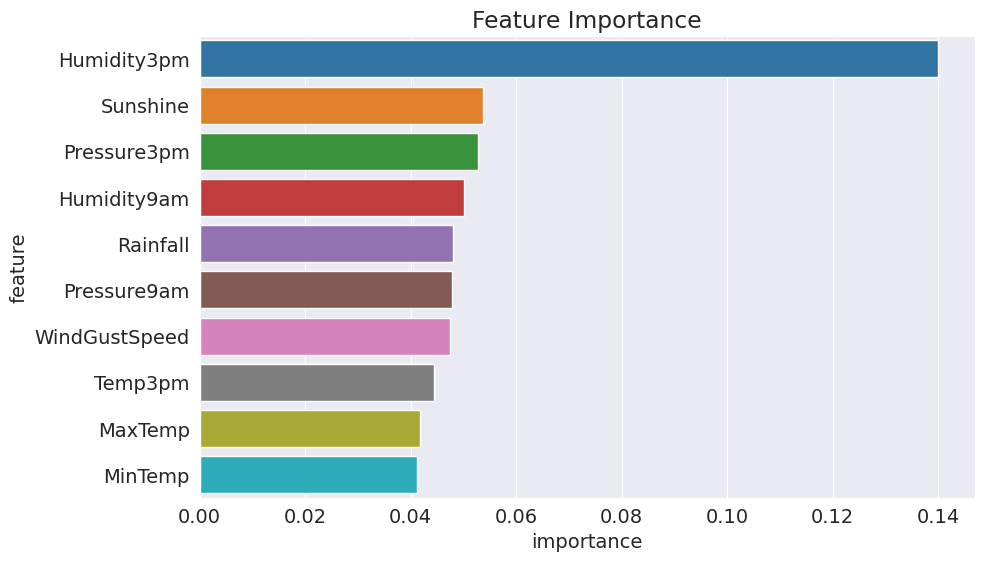

In [ ]:
plt.title('Feature Importance')
sns.barplot(data = importance_df.head(10),x='importance',y='feature');

In [ ]:
#Hyperarameter tuning of RandomForest

In [ ]:
#  ?RandomForestClassifier

In [ ]:
base_model = RandomForestClassifier(random_state= 42,n_jobs=-1).fit(X_train,train_targets)

In [ ]:
base_train_acc=base_model.score(X_train,train_targets)
base_val_acc= base_model.score(X_val,val_targets)

In [ ]:
base_accs = base_train_acc,base_val_acc
base_accs

(0.9999494888269285, 0.8566537055307295)

In [ ]:
#changing the number of estimators
# since default there will be 100 n_estimators, but here we will define it as 10 n_estimators

In [ ]:
model = RandomForestClassifier(random_state = 42,n_jobs=-1,n_estimators=10)

In [ ]:
model.fit(X_train,train_targets)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [ ]:
model.score(X_train,train_targets),model.score(X_val,val_targets)

(0.986958015112943, 0.8485868492832686)

In [ ]:
base_accs

(0.9999494888269285, 0.8566537055307295)

#500 estimators

In [ ]:
#model = RandomForestClassifier(random_state = 42,n_jobs=-1,n_estimators=500)
#model.fit(X_train,train_targets)

In [ ]:
#model.score(X_train,train_targets),model.score(X_val,val_targets)

In [ ]:
# train_error = 1- model.score(X_train,train_targets)
# val_error   = 1- model.score(X_val,val_targets)
# (train_error,val_error)

In [ ]:
# def estimator(n_est):
#   model = RandomForestClassifier(n_jobs=-1,random_state=42,n_estimators=n_est)
#   model.fit(X_train,train_targets)
#   train_error = 1-model.score(X_train,train_targets)
#   val_error   = 1- model.score(X_val,val_targets)
#   return {'number of estimators':n_est,'Training Error':train_error,'validation Error':val_error}

In [ ]:
# results = [
#     estimator(10),
#     estimator(50),
#     estimator(100)
# ]

In [ ]:
# errors_df = pd.DataFrame(results)

In [ ]:
# errors_df

In [ ]:
# plt.plot(errors_df['number of estimators'],errors_df['Training Error'])
# plt.plot(errors_df['number of estimators'],errors_df['validation Error'])
# plt.legend(['Training Error','validation Error'])

#let's define helper function test_params with **paramns to make it test hyperparameters

In [ ]:
def test_params(**params):
  model = RandomForestClassifier(random_state=42,n_jobs=-1,**params).fit(X_train,train_targets)
  return model.score(X_train,train_targets),model.score(X_val,val_targets)

#let's try for max_depth and leaf_nodes

In [ ]:
test_params(max_depth=5)

(0.8197862367155615, 0.8240961058557251)

In [ ]:
test_params(max_depth=26)

(0.9814826039519942, 0.8572340549010504)

In [ ]:
#test_params(max_leaf_nodes= 2**20)

In [ ]:
test_params(max_leaf_nodes=2**5) #keeping it as 32

(0.8314341132258456, 0.833904010214149)

In [ ]:
test_params(max_features=3)

(0.9999494888269285, 0.8543323080494458)

In [ ]:
test_params(max_features=6)

(0.9999595910615429, 0.8558992513493123)

In [ ]:
base_accs

(0.9999494888269285, 0.8566537055307295)

In [ ]:
#min_samples_split & min_samples_leaf as hyperparameters

In [ ]:
test_params(min_samples_split=3,min_samples_leaf = 2)

(0.9625005051117307, 0.8565956705936975)

#min_impurity_decrease

In [ ]:
test_params(min_impurity_decrease=1e-6)

(0.9888168262819735, 0.8561313910974406)

In [ ]:
#bootstrap,max_samples

In [ ]:
test_params(bootstrap=False)

(0.9999797955307714, 0.8567697754047937)

In [ ]:
test_params(max_samples=.9)

(0.9997676486038711, 0.8565376356566653)

No     76705
Yes    22283
Name: RainTomorrow, dtype: int64